In [16]:
import sys, os
os.path.dirname(sys.executable)

'/clusterfs/nilah/sergio/miniconda3/envs/ESM_cambrian/bin'

In [17]:
sys.path.append('/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/')
from ESMCBA.imports import *
from ESMCBA import graph_utils
from ESMCBA import other_utils
import importlib
importlib.reload(other_utils)

<module 'ESMCBA.other_utils' from '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/ESMCBA/other_utils.py'>

In [18]:
def classify(name):
    name_lower = name.lower()
    if 'virus' in name_lower:
        return 'virus'
    elif 'mycobacterium' in name_lower:
        return 'bacterium'
    else:
        return 'other'

# Get all matching CSV files in the folder (here limiting to first 10 for example)
file_list = glob.glob('/global/scratch/users/sergiomar10/data/IEDB_SQL/IEDB_*_final.csv')

# Dictionary to store the counts per file
counts_by_file = {}

for file in file_list:
    try:
        # Read file; if empty, skip it.
        df = pd.read_csv(file, header=None)
        if df.empty:
            print(f"Skipping empty file: {file}")
            continue
    except pd.errors.EmptyDataError:
        print(f"Skipping empty file (error): {file}")
        continue

    # Filter rows: Column 7 must not be NA and Column 8 must contain 'Positive'
    df_filtered = df[(df[7].notna()) ] #& (df[8].str.contains('Positive'))]
    
    # Select only HLA allele (column 0) and species name (column 6) then drop duplicates
    df_filtered = df_filtered[[0, 6]].drop_duplicates()
    df_filtered.columns = ['hla', 'name']
    
    # Create a new column with the category classification
    df_filtered['category'] = df_filtered['name'].apply(classify)
    
    # Count the occurrences per category in this file
    category_counts = df_filtered['category'].value_counts()
    
    # Use the basename of the file as the column key
    file_key = os.path.basename(file)
    counts_by_file[file_key] = category_counts

# Combine the counts from all files into a single DataFrame,
# with rows as categories and columns as file names.
aggregated_table = pd.DataFrame(counts_by_file).fillna(0).astype(int)

Skipping empty file (error): /global/scratch/users/sergiomar10/data/IEDB_SQL/IEDB_HLAB5502_final.csv
Skipping empty file (error): /global/scratch/users/sergiomar10/data/IEDB_SQL/IEDB_HLADQ6_final.csv
Skipping empty file (error): /global/scratch/users/sergiomar10/data/IEDB_SQL/IEDB_HLADQA10101DQB10503_final.csv
Skipping empty file (error): /global/scratch/users/sergiomar10/data/IEDB_SQL/IEDB_HLAB0801BI66Amutant_final.csv
Skipping empty file (error): /global/scratch/users/sergiomar10/data/IEDB_SQL/IEDB_HLADRB11305_final.csv
Skipping empty file (error): /global/scratch/users/sergiomar10/data/IEDB_SQL/IEDB_HLADPB11501_final.csv
Skipping empty file (error): /global/scratch/users/sergiomar10/data/IEDB_SQL/IEDB_HLAA0208_final.csv
Skipping empty file (error): /global/scratch/users/sergiomar10/data/IEDB_SQL/IEDB_HLADPB11101_final.csv
Skipping empty file (error): /global/scratch/users/sergiomar10/data/IEDB_SQL/IEDB_HLAA0201K66A,E63Qmutant_final.csv
Skipping empty file (error): /global/scratch/us

In [19]:
df

,0,1,2,3,4,5,6,7,8,9
0,NLLVQYGAKI,44801,28769,AAO89309.1,ankyrin-like protein,10254,Vaccinia virus WR (Vaccinia virus (strain WR)),1320.0,Positive-Low,\N
1,DIIDLLLPST,8660,28777,AAO89309.1,ankyrin-like protein,10254,Vaccinia virus WR (Vaccinia virus (strain WR)),6590.0,Negative,\N
2,ETMYLTMKAI,14490,28795,AAO89309.1,ankyrin-like protein,10254,Vaccinia virus WR (Vaccinia virus (strain WR)),25.2,Positive-High,\N
3,IICEDAMYYA,26446,28788,AAO89309.1,ankyrin-like protein,10254,Vaccinia virus WR (Vaccinia virus (strain WR)),108.0,Positive-Intermediate,\N
4,EVIERINLL,14724,26840,AAO89309.1,ankyrin-like protein,10254,Vaccinia virus WR (Vaccinia virus (strain WR)),292.0,Positive-Intermediate,\N
...,...,...,...,...,...,...,...,...,...,...
6468,SIQLDEKSSI,58674,42883,P16714.2,\N,\N,\N,131.0,Positive-Intermediate,\N
6469,QVKDNIISRT,52722,32156,P16714.2,\N,\N,\N,421.0,Positive-Intermediate,\N
6470,DQLVFNSISA,9875,27145,P16714.2,\N,\N,\N,289.0,Positive-Intermediate,\N
6471,AMHDKKIDIL,3101,26723,AAO89380.1,\N,\N,\N,1180.0,Positive-Low,\N


In [20]:
aggregated_table.columns = [x.split('_')[1] for x in aggregated_table.columns]

In [21]:
aggregated_table

,HLADRB10701,HLAA1,HLADQA10501DQB10303,HLAB39,HLADPB10501,HLADRB10404,HLADRB40101,HLADRB10303,HLAA2601,HLAA3101,...,HLADQA10303DQB10402,HLAA2,HLADRB10801,HLAB1302,HLADQA10102DQB10604,HLAA0201,HLADR14,HLA-DQB1*05:01,HLAB58,HLAA0203
category,,,,,,,,,,,,,,,,,,,,,
bacterium,115,0,0,0,0,74,132,0,85,124,...,0,16,5,0,0,274,21,0,0,33
other,2248,4,564,2,160,909,1725,46,2135,2380,...,567,67,126,2,61,6889,70,158,1,2311
virus,931,11,0,3,1,483,479,0,1023,2235,...,0,17,31,1,0,7325,0,1,5,3251


In [22]:
aggregated_table.T.sort_values('virus', ascending=False).head(20)

category,bacterium,other,virus
HLAA0201,274,6889,7325
HLADRB10101,131,5516,3418
HLAA6802,40,2394,3312
HLAA0203,33,2311,3251
HLAA0206,19,1944,3066
HLAA0202,0,1611,2782
HLAA0301,113,3457,2693
HLAA1101,119,2771,2660
HLAA3101,124,2380,2235
HLAA6801,20,1248,1760


In [23]:
aggregated_table_subset = aggregated_table[['HLAA1101', 'HLAB3901', 'HLAA3001', 'HLAA0203', 'HLAA0206',
       'HLAB3501', 'HLAA0202', 'HLAA6801', 'HLAA2301', 'HLAB5801',
       'HLAA2403', 'HLAB1517', 'HLAA3002', 'HLAA6802', 'HLAA3301',
       'HLAB0702', 'HLAA0201', 'HLAA2902', 'HLAB1501', 'HLAB0801',
       'HLAA0301', 'HLAB4402', 'HLAA2402', 'HLAA6901', 'HLAA0101',
       'HLAA2601', 'HLAB5701', 'HLAB1801', 'HLAB5101', 'HLAB4601']]

In [24]:
aggregated_table_subset = aggregated_table_subset.T.sort_values('virus', ascending=False).T

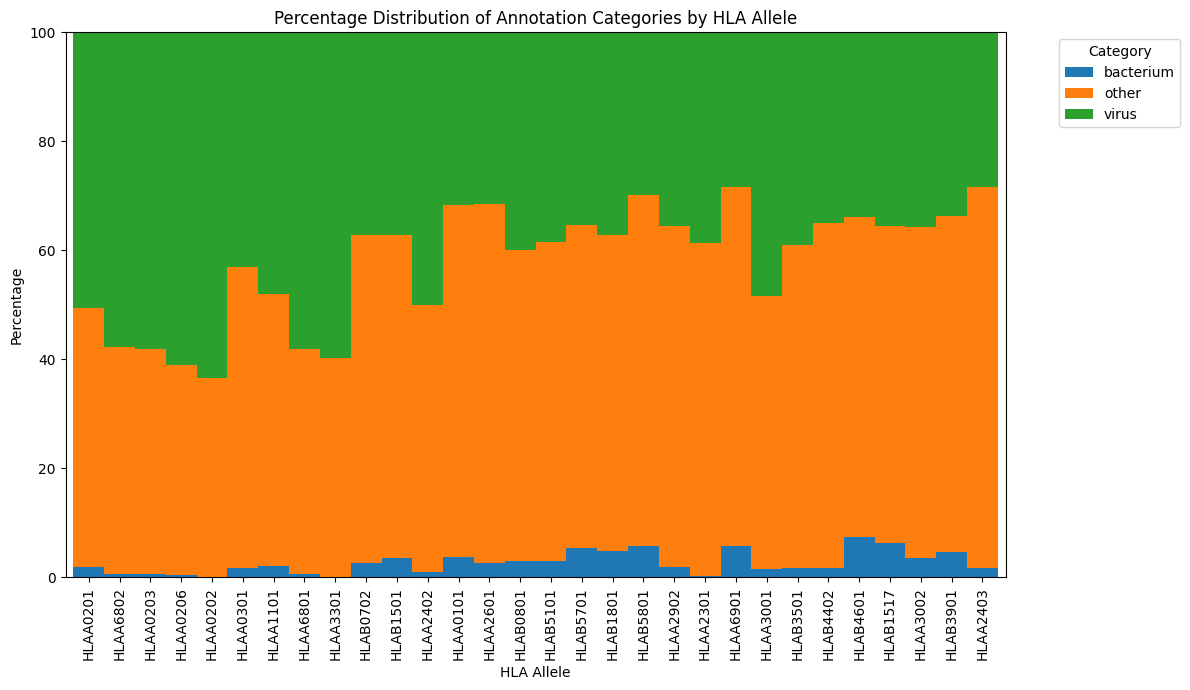

In [25]:
import matplotlib.pyplot as plt

# Remove columns where the sum of counts (across all categories) is zero
aggregated_table_subset_filtered = aggregated_table_subset.loc[:, aggregated_table_subset.sum(axis=0) != 0]

# Convert counts to percentages per HLA allele (per column)
percent_table = aggregated_table_subset_filtered.div(aggregated_table_subset_filtered.sum(axis=0), axis=1) * 100

# Create the stacked bar graph with width=1 (removes gaps between bars)
fig, ax = plt.subplots(figsize=(12, 7))
percent_table.T.plot(kind='bar', stacked=True, ax=ax, width=1)

# Remove borders between bar segments
for patch in ax.patches:
    patch.set_linewidth(0)
    patch.set_edgecolor('none')

# Set axis labels and title
ax.set_xlabel("HLA Allele")
ax.set_ylabel("Percentage")
ax.set_title("Percentage Distribution of Annotation Categories by HLA Allele")
ax.set_ylim(0, 100)
# ax.set_xticklabels([])

# Position the legend outside of the plot area
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [26]:
aggregated_table_subset

,HLAA0201,HLAA6802,HLAA0203,HLAA0206,HLAA0202,HLAA0301,HLAA1101,HLAA6801,HLAA3301,HLAB0702,...,HLAA2301,HLAA6901,HLAA3001,HLAB3501,HLAB4402,HLAB4601,HLAB1517,HLAA3002,HLAB3901,HLAA2403
category,,,,,,,,,,,,,,,,,,,,,
bacterium,274,40,33,19,0,113,119,20,0,96,...,6,136,21,29,30,123,88,49,62,22
other,6889,2394,2311,1944,1611,3457,2771,1248,1157,2226,...,1055,1545,681,971,1148,986,819,816,831,851
virus,7325,3312,3251,3066,2782,2693,2660,1760,1721,1376,...,668,665,658,639,634,567,500,482,455,345


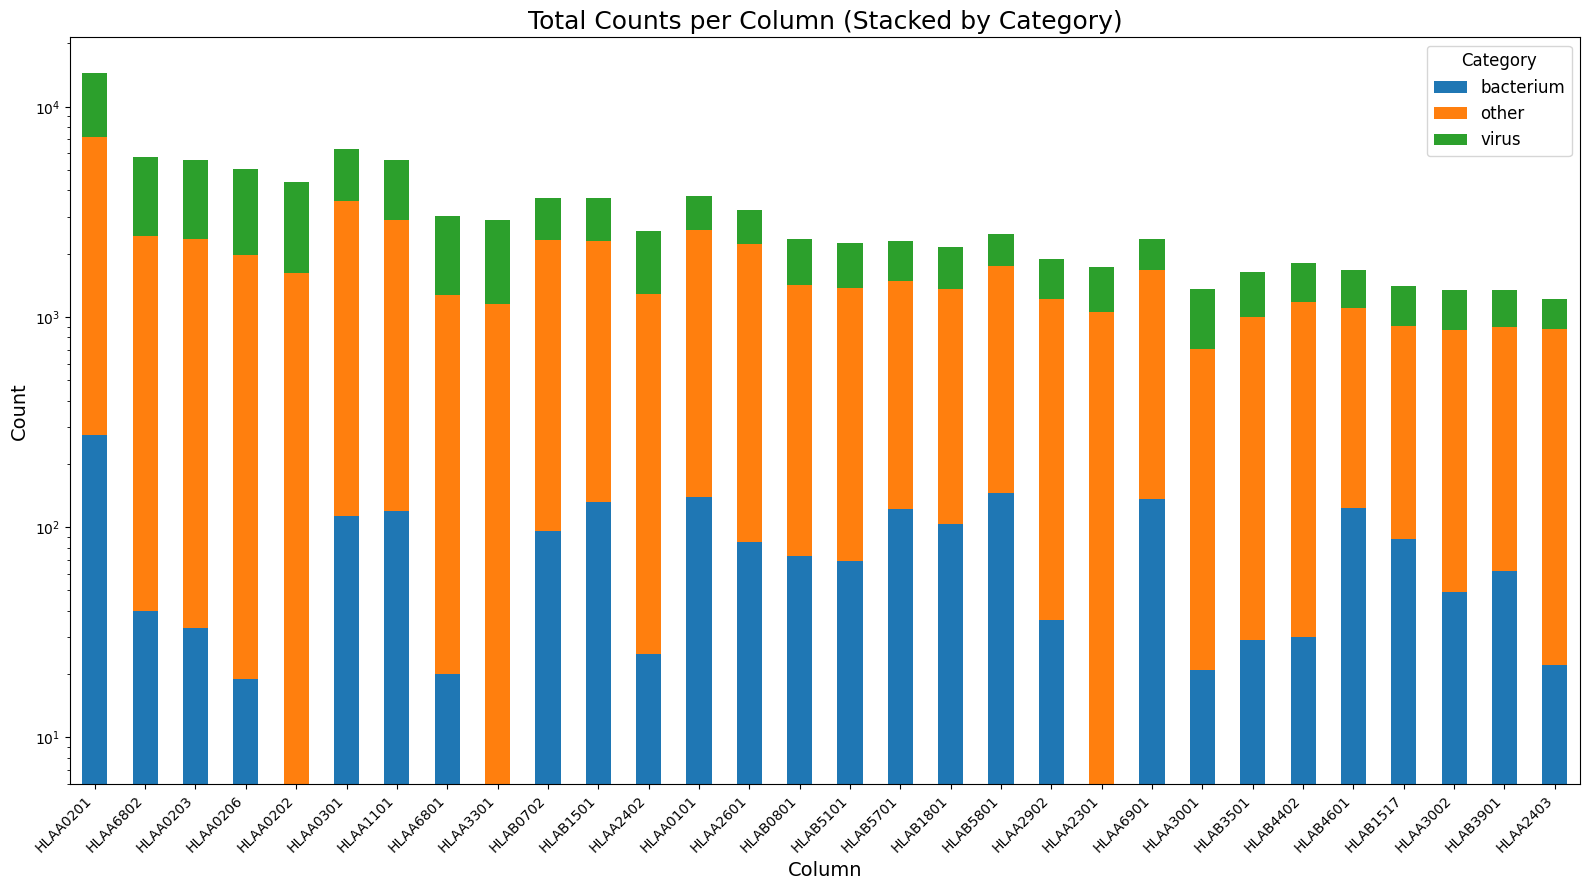

In [42]:
fig, ax = plt.subplots(figsize=(16, 9))

# Create the stacked bar plot.
aggregated_table_subset.T.plot(kind='bar', stacked=True, ax=ax)

# Set the title and axis labels.
ax.set_title("Total Counts per Column (Stacked by Category)", fontsize=18)
ax.set_xlabel("Column", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.legend(title="Category", fontsize=12, title_fontsize=12)


plt.yscale('log')
# Rotate the x-tick labels for readability.
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Original dataframe with log_IC50:
         peptide     IC50  log_IC50
0     NLLVQYGAKI   1320.0  3.120574
1     DIIDLLLPST   6590.0  3.818885
2     ETMYLTMKAI     25.2  1.401401
3     IICEDAMYYA    108.0  2.033424
4      EVIERINLL    292.0  2.465383
...          ...      ...       ...
6468  SIQLDEKSSI    131.0  2.117271
6469  QVKDNIISRT    421.0  2.624282
6470  DQLVFNSISA    289.0  2.460898
6471  AMHDKKIDIL   1180.0  3.071882
6472   EIKSLFNTI  20000.0  4.301030

[6473 rows x 3 columns]

Encoded features shape: (6473, 246)

Linear Regression Mean Squared Error: 1.0073322734459105

Linear Regression Coefficients (top 10):
      feature  coefficient  abs_coef
181  pos_10_C     2.628927  2.628927
190  pos_10_P    -2.073100  2.073100
30    pos_2_M    -1.597099  1.597099
29    pos_2_L    -1.565299  1.565299
177   pos_9_V    -1.179153  1.179153
192  pos_10_R     1.159134  1.159134
182  pos_10_D    -1.152099  1.152099
195  pos_10_V    -1.037642  1.037642
183  pos_10_E    -0.967737  0.967737
26

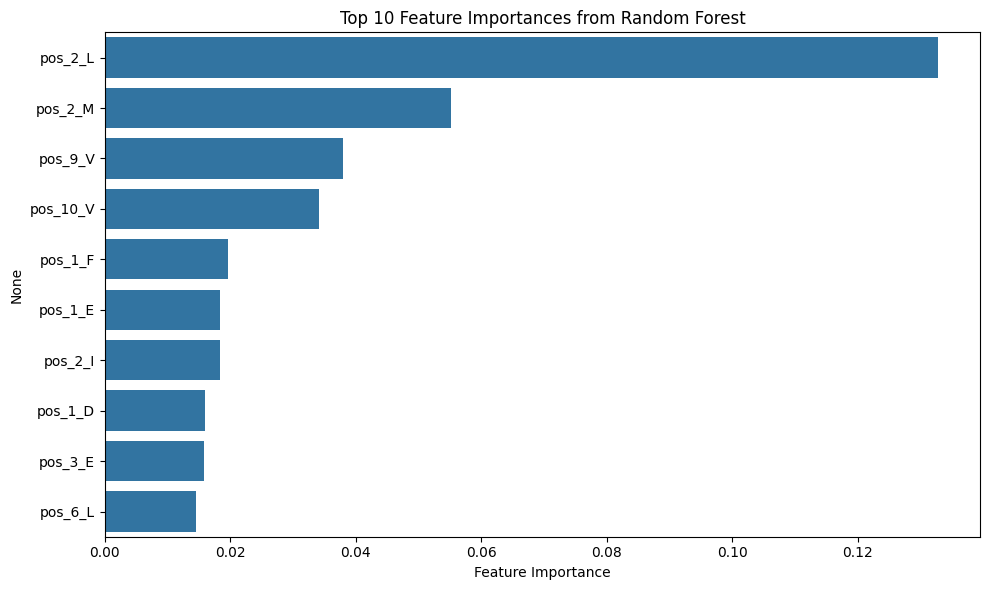

In [28]:

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Rename columns for clarity
df.columns = ['peptide', 'col1', 'col2', 'protein_id', 'protein_desc', 
              'col5', 'organism', 'IC50', 'binding_class', 'col9']

# ---------------------------
# 2. Data Preprocessing
# ---------------------------
# Convert IC50 to numeric and compute log10(IC50)
df['IC50'] = pd.to_numeric(df['IC50'])
df['log_IC50'] = np.log10(df['IC50'])

# Check the dataframe
print("Original dataframe with log_IC50:")
print(df[['peptide', 'IC50', 'log_IC50']])

# ---------------------------
# 3. Extract positional amino acid features
# ---------------------------
# We assume all peptides are of the same length; here they appear to be 10-mers.
peptide_length = df['peptide'].str.len().max()
for i in range(peptide_length):
    df[f'pos_{i+1}'] = df['peptide'].str[i]


# ---------------------------
# 4. One-hot encode the peptide positions
# ---------------------------
# We'll one-hot encode each positional column and then combine them.
pos_cols = [f'pos_{i+1}' for i in range(peptide_length)]
df_encoded = pd.get_dummies(df[pos_cols], prefix=pos_cols)
print("\nEncoded features shape:", df_encoded.shape)

# ---------------------------
# 5. Modeling: Predict log(IC50) from peptide sequence features
# ---------------------------
# Our target variable is log_IC50.
X = df_encoded
y = df['log_IC50']

# Split into training and test sets (here with a very small dataset; in practice you’d use more data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# --- 5A. Linear Regression ---
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
print("\nLinear Regression Mean Squared Error:", mse_lin)

# Display coefficients sorted by absolute value
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': linreg.coef_
})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)
print("\nLinear Regression Coefficients (top 10):")
print(coef_df.head(10))

# --- 5B. Random Forest Regressor ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("\nRandom Forest Mean Squared Error:", mse_rf)

# Feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)
print("\nRandom Forest Feature Importances (top 10):")
print(feat_importances.head(10))

# ---------------------------
# 6. Visualize the feature importances from Random Forest
# ---------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.head(10), y=feat_importances.head(10).index)
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

# ---------------------------
# 7. (Optional) Visualize Sequence Logos
# ---------------------------
# For illustration, you might want to create a simple sequence logo from high-affinity peptides.
# In practice, you could use tools like Logomaker (pip install logomaker)
# Here is an example for a basic frequency plot:
import logomaker

# Let's say high affinity corresponds to log_IC50 below the median (lower log(IC50) means lower IC50)
threshold = df['log_IC50'].median()
high_affinity = df[df['log_IC50'] < threshold]

# Create a count matrix: count frequency of each amino acid at each position.
count_matrix = {pos: list(high_affinity[pos].value_counts().reindex(list("ACDEFGHIKLMNPQRSTVWY"), fill_value=0))
                for pos in pos_cols}
                
# Build the DataFrame: rows = positions, columns = amino acids.
count_df = pd.DataFrame(count_matrix, index=list("ACDEFGHIKLMNPQRSTVWY")).T

# --- Fix the index: convert "pos_1", "pos_2", ... to numeric positions ---
count_df.index = [int(x.split('_')[1]) for x in count_df.index]

# Plot the sequence logo using Logomaker.
logo = logomaker.Logo(count_df.iloc[:10, :], shade_below=.5, fade_below=.5) #, font_name='Arial Rounded MT Bold')
logo.ax.set_ylabel("Frequency")
logo.ax.set_title("Sequence Logo for High Affinity Peptides")
plt.show()

Original dataframe with log_IC50:
         peptide     IC50  log_IC50
0     NLLVQYGAKI   1320.0  3.120574
1     DIIDLLLPST   6590.0  3.818885
2     ETMYLTMKAI     25.2  1.401401
3     IICEDAMYYA    108.0  2.033424
4      EVIERINLL    292.0  2.465383
...          ...      ...       ...
6468  SIQLDEKSSI    131.0  2.117271
6469  QVKDNIISRT    421.0  2.624282
6470  DQLVFNSISA    289.0  2.460898
6471  AMHDKKIDIL   1180.0  3.071882
6472   EIKSLFNTI  20000.0  4.301030

[6473 rows x 3 columns]

Dataframe with enrichment labels (1 = Positive, 0 = Negative):
         peptide  log_IC50  enrichment
0     NLLVQYGAKI  3.120574           0
1     DIIDLLLPST  3.818885           0
2     ETMYLTMKAI  1.401401           1
3     IICEDAMYYA  2.033424           1
4      EVIERINLL  2.465383           1
...          ...       ...         ...
6468  SIQLDEKSSI  2.117271           1
6469  QVKDNIISRT  2.624282           1
6470  DQLVFNSISA  2.460898           1
6471  AMHDKKIDIL  3.071882           0
6472   EIKSLFNTI

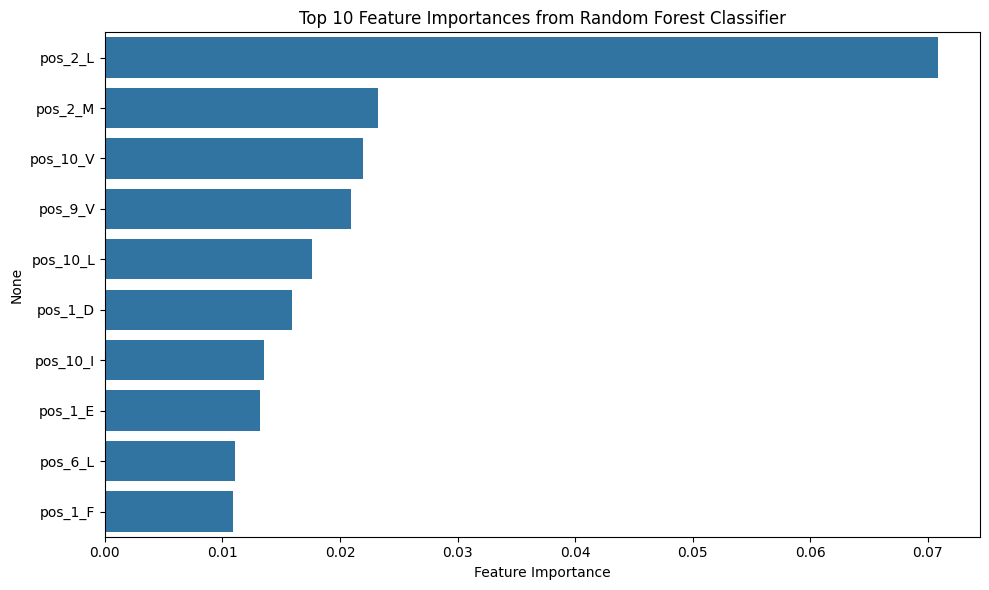

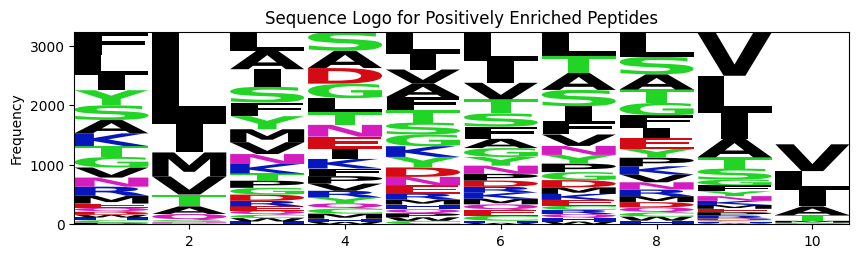

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------------------
# 2. Data Preprocessing
# ---------------------------
# Convert IC50 to numeric and compute log10(IC50)
df['IC50'] = pd.to_numeric(df['IC50'])
df['log_IC50'] = np.log10(df['IC50'])

print("Original dataframe with log_IC50:")
print(df[['peptide', 'IC50', 'log_IC50']])

# ---------------------------
# 3. Create Enrichment Labels
# ---------------------------
# Define enrichment based on the median of log_IC50.
# Lower log_IC50 (i.e. high affinity) is considered positive enrichment.
threshold = df['log_IC50'].median()
df['enrichment'] = np.where(df['log_IC50'] < threshold, 1, 0)

print("\nDataframe with enrichment labels (1 = Positive, 0 = Negative):")
print(df[['peptide', 'log_IC50', 'enrichment']])

# ---------------------------
# 4. Extract Positional Amino Acid Features
# ---------------------------
# We assume all peptides are of the same length; here they appear to be 10-mers.
peptide_length = df['peptide'].str.len().max()
for i in range(peptide_length):
    df[f'pos_{i+1}'] = df['peptide'].str[i]

# ---------------------------
# 5. One-Hot Encode the Peptide Positions
# ---------------------------
# One-hot encode each positional column and combine them.
pos_cols = [f'pos_{i+1}' for i in range(peptide_length)]
df_encoded = pd.get_dummies(df[pos_cols], prefix=pos_cols)
print("\nEncoded features shape:", df_encoded.shape)

# ---------------------------
# 6. Modeling: Classify Enrichment from Peptide Sequence Features
# ---------------------------
# Our target variable is now the binary enrichment label.
X = df_encoded
y = df['enrichment']

# Split into training and test sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# --- 6A. Logistic Regression ---
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluate Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("\nLogistic Regression Accuracy:", accuracy_logreg)
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

# Display coefficients sorted by absolute value
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': logreg.coef_[0]
})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)
print("\nLogistic Regression Coefficients (top 10):")
print(coef_df.head(10))

# --- 6B. Random Forest Classifier ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classifier Accuracy:", accuracy_rf)
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Feature importance from Random Forest
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)
print("\nRandom Forest Feature Importances (top 10):")
print(feat_importances.head(10))

# ---------------------------
# 7. Visualize the Feature Importances from Random Forest
# ---------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.head(10), y=feat_importances.head(10).index)
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances from Random Forest Classifier")
plt.tight_layout()
plt.show()

# ---------------------------
# 8. (Optional) Visualize Sequence Logos for Positively Enriched Peptides
# ---------------------------
# Here, we consider peptides with positive enrichment (enrichment == 1).
positive_enriched = df[df['enrichment'] == 1]

# Create a count matrix: count frequency of each amino acid at each position.
count_matrix = {
    pos: list(positive_enriched[pos].value_counts().reindex(list("ACDEFGHIKLMNPQRSTVWY"), fill_value=0))
    for pos in pos_cols
}

# Build the DataFrame: rows = positions, columns = amino acids.
count_df = pd.DataFrame(count_matrix, index=list("ACDEFGHIKLMNPQRSTVWY")).T

# Convert "pos_1", "pos_2", ... to numeric positions for clarity
count_df.index = [int(x.split('_')[1]) for x in count_df.index]

# Plot the sequence logo using Logomaker.
logo = logomaker.Logo(count_df.iloc[:10, :], shade_below=0.5, fade_below=0.5)
logo.ax.set_ylabel("Frequency")
logo.ax.set_title("Sequence Logo for Positively Enriched Peptides")
plt.show()


In [40]:
df_pos = df[df['binding_class'].str.contains('Positive')]

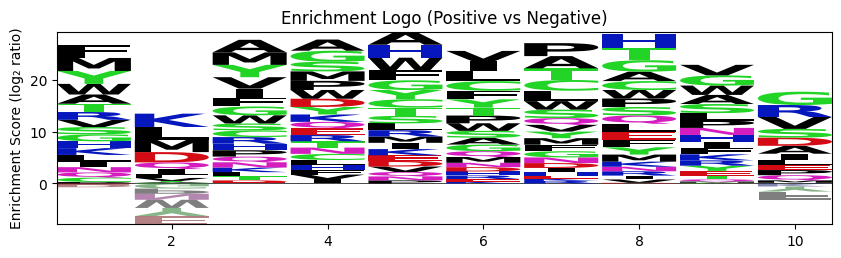

In [41]:

pseudocount = 1

# Separate the dataframe into positive (enrichment==1) and negative (enrichment==0) groups
positive_group = df_pos[df_pos['enrichment'] == 1]
negative_group = df_pos[df_pos['enrichment'] == 0]

# Initialize a dictionary to hold the enrichment scores for each position
enrichment_matrix = {}

# List of standard amino acids to consider
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

for pos in pos_cols:
    # Count the occurrences of each amino acid at this position for both groups
    pos_positive_counts = positive_group[pos].value_counts().reindex(amino_acids, fill_value=0)
    pos_negative_counts = negative_group[pos].value_counts().reindex(amino_acids, fill_value=0)
    
    # Calculate the enrichment score as the log2 ratio of positive to negative counts
    enrichment_score = np.log2((pos_positive_counts + pseudocount) / (pos_negative_counts + pseudocount))
    enrichment_matrix[pos] = enrichment_score

# Create a DataFrame: rows = positions, columns = amino acids
enrichment_df_pos = pd.DataFrame(enrichment_matrix).T

# Clip the enrichment values to the range -5 to 5 (you can adjust this range as needed)
enrichment_df_pos = enrichment_df_pos.clip(lower=-5, upper=5)

# Convert the index from 'pos_1', 'pos_2', ... to numeric positions for clarity
enrichment_df_pos.index = [int(x.split('_')[1]) for x in enrichment_df_pos.index]

# Plot the enrichment logo using Logomaker.
logo = logomaker.Logo(enrichment_df_pos.iloc[:10, :], shade_below=0.5, fade_below=0.5)
logo.ax.set_ylabel("Enrichment Score (log₂ ratio)")
logo.ax.set_title("Enrichment Logo (Positive vs Negative)")
plt.show()
